### aim: 

### date: 

In [49]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [50]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

Text(0.5, 0.98, 'colours assigned')

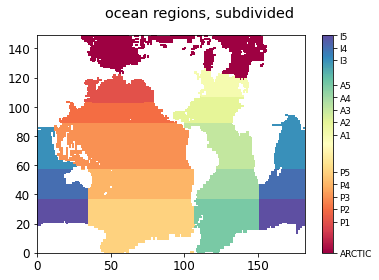

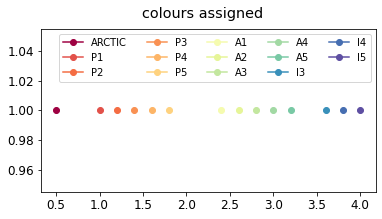

In [51]:
regs = ['ARCTIC', 'P1', 'P2', 'P3', 'P4', 'P5', 'A1', 'A2', 'A3', 'A4', 'A5', 'I3', 'I4', 'I5']

regdict = {'ARCTIC' : {'number' : 0.5},
           'P1' : {'number': 1.0},
          'P2' : {'number': 1.2},
           'P3' : {'number': 1.4},
           'P4' : {'number': 1.6},
           'P5' : {'number': 1.8},
            'A1' : {'number': 2.4},
          'A2' : {'number': 2.6},
           'A3' : {'number': 2.8},
           'A4' : {'number': 3},
           'A5' : {'number': 3.2},
           'I3' : {'number': 3.6},
           'I4' : {'number': 3.8},
           'I5' : {'number': 4},
           
          }
    
tics = []
tcm = 'Spectral'
tmask = nc.Dataset('/gpfs/data/greenocean/software/resources/breakdown/clq_basin_masks_ORCA.nc')

maskno = np.zeros([149,182])
for i in range(0, len(regs)):
    maskno[tmask[regs[i]][:] == 1] = regdict[regs[i]]['number']
    tics.append(regdict[regs[i]]['number'])
maskno[maskno == 0] = np.nan


w = plt.pcolor(maskno, cmap = tcm, vmin = 0.5, vmax = 4)
cbar = plt.colorbar(w, ticks=tics)
t = cbar.ax.set_yticklabels(['ARCTIC', 'P1', 'P2', 'P3', 'P4', 'P5', 'A1', 'A2', 'A3', 'A4', 'A5', 'I3', 'I4', 'I5'], fontsize = 9)
plt.suptitle('ocean regions, subdivided')

fact = 0.2
fig = plt.figure(figsize=(30*fact,15*fact))
import matplotlib
cmap = matplotlib.cm.get_cmap('Spectral')
norm = matplotlib.colors.Normalize(vmin=0.5, vmax=4)
for i in range(0,len(regs)):
    rgba = cmap(norm(regdict[regs[i]]['number']))
    plt.plot(regdict[regs[i]]['number'], 1, marker = 'o', color = rgba, label = regs[i])
    regdict[regs[i]]['colour'] = rgba
plt.legend(ncol = 5, fontsize = 10)
plt.suptitle('colours assigned')

In [52]:
def haversine(lon1, lat1, lon2, lat2):
    """Calculate the great-circle distance in kilometers between two points
    on a sphere from their longitudes and latitudes.
    Reference: http://www.movable-type.co.uk/scripts/latlong.html
    :arg lon1: Longitude of point 1.
    :type lon1: float or :py:class:`numpy.ndarray`
    :arg lat1: Latitude of point 1.
    :type lat1: float or :py:class:`numpy.ndarray`
    :arg lon2: Longitude of point 2.
    :type lon2: float or :py:class:`numpy.ndarray`
    :arg lat2: Latitude of point 2.
    :type lat2: float or :py:class:`numpy.ndarray`
    :returns: Great-circle distance between two points in km
    :rtype: float or :py:class:`numpy.ndarray`
    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

def find_closest(lon1, lat1):
    w = nc.Dataset('/gpfs/data/greenocean/software/runs/TOM12_TJ_1ASA/ORCA2_1m_20500101_20501231_ptrc_T.nc')
    lats = (w['nav_lat'][:])
    lons = w['nav_lon'][:]
    km = haversine(lon1, lat1, lons, lats)
    q = (np.where(km == np.min(km)))
    tY = q[0][0]
    tX = q[1][0]

    return tY, tX


dataframe used in this analysis was made in `./runner_surf.py`

In [53]:
horse = False
if horse:
    glodap.head()

    lat = np.array(glodap.LAT)
    lon = np.array(glodap.LON)
    tY = np.zeros_like(lat)
    tX = np.zeros_like(lat)
    print(len(tX))

    for i in range(0,len(lat)):
        if i%1000 == 0:
            print(i)
        tY[i], tX[i] = find_closest(lon[i], lat[i])

    glodap['tY'] = tY
    glodap['tX'] = tX

    glodap.to_csv('./GLODAPv2.2022_GLOBE_valid_DICTA_umolL_surface_XY.csv')

In [54]:
df = pd.read_csv('/gpfs/home/mep22dku/scratch/SOZONE/MaiInternship/GLODAPv2.2022_GLOBE_valid_DICTA_umolL_surface_XY.csv')

In [55]:
df.head()

,Unnamed: 0,Unnamed: 0.1,YR,MONTH,DIC,ALK,SAL,TEMP,PRES,LAT,LON,BOTTOMdepth,tY,tX
0,0,0,1996.0,8.0,2162.884649,2325.198591,33.859,-1.756,10.0,82.06,91.26,1006.0,145.0,40.0
1,1,1,1996.0,8.0,2167.532405,2325.841682,33.873,-1.772,10.0,82.09,91.50,1532.0,145.0,40.0
2,2,2,1996.0,8.0,2165.054342,2318.233427,33.925,-1.794,10.0,82.19,91.91,2075.0,145.0,40.0
3,3,3,1996.0,8.0,2147.608580,2308.509691,34.057,-1.807,10.0,82.52,92.30,2903.0,145.0,41.0
4,4,4,1996.0,8.0,2146.907571,2309.659502,34.068,-1.799,10.0,82.68,92.52,3086.0,145.0,41.0


In [87]:
tMONTH = np.array(df['MONTH'])
tY = np.array(df['tY'])
tX = np.array(df['tX'])
tREG_new = np.array(df['tX'])

for j in range(len(tY)):
    y = tY[j].astype(int)
    x = tX[j].astype(int)
    tREG_new[j] = maskno[y, x]
    
df['tREG_new'] = tREG_new


tSEAS = np.zeros_like(tMONTH)
for i in range(0,len(tMONTH)):
    if (tMONTH[i] <= 2) | (tMONTH[i] == 12):
        tSEAS[i] = 1
    if (tMONTH[i] >=3) & (tMONTH[i] < 6):
        tSEAS[i] = 2
    if (tMONTH[i] >=6) & (tMONTH[i] < 9):
        tSEAS[i] = 3
    if (tMONTH[i] >=9) & (tMONTH[i] < 12):
        tSEAS[i] = 4

df['tSEAS'] = tSEAS.astype(int)
tSO = np.zeros_like(tREG_new)
tSO[(tREG_new == 1.8) |(tREG_new == 3.2) |(tREG_new == 4)] = 1
df['TA-DIC'] = df.ALK - df.DIC
df['TA-DIC'] = df.ALK - df.DIC
df['tSO'] = tSO
try:
    df = df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
except:
    print('already dropped')

already dropped


In [135]:
df = df[df.PRES <= 10]
df


,YR,MONTH,DIC,ALK,SAL,TEMP,PRES,LAT,LON,BOTTOMdepth,tY,tX,tREG_new,tSEAS,TA-DIC,tSO
0,1996.0,8.0,2162.884649,2325.198591,33.8590,-1.7560,10.00,82.0600,91.2600,1006.0,145.0,40.0,NaN,3,162.313942,0.0
1,1996.0,8.0,2167.532405,2325.841682,33.8730,-1.7720,10.00,82.0900,91.5000,1532.0,145.0,40.0,NaN,3,158.309277,0.0
2,1996.0,8.0,2165.054342,2318.233427,33.9250,-1.7940,10.00,82.1900,91.9100,2075.0,145.0,40.0,NaN,3,153.179084,0.0
3,1996.0,8.0,2147.608580,2308.509691,34.0570,-1.8070,10.00,82.5200,92.3000,2903.0,145.0,41.0,0.5,3,160.901112,0.0
4,1996.0,8.0,2146.907571,2309.659502,34.0680,-1.7990,10.00,82.6800,92.5200,3086.0,145.0,41.0,0.5,3,162.751931,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21901,2010.0,11.0,2134.069967,2373.218824,35.1768,13.8329,6.15,-39.2476,7.7422,5339.0,44.0,145.0,3.0,4,239.148856,0.0
21902,2010.0,11.0,2093.653971,2394.285941,35.5129,18.0439,8.95,-34.3201,17.5910,1001.0,47.0,150.0,NaN,4,300.631971,0.0
21903,2010.0,11.0,2100.932806,2380.988790,35.4723,17.2661,6.55,-37.4566,11.5819,5030.0,45.0,147.0,3.0,4,280.055984,0.0
21905,2010.0,11.0,2099.640310,2381.124236,35.4880,17.4356,6.30,-34.7111,17.0372,2859.0,46.0,150.0,3.0,4,281.483927,0.0


In [134]:
df

,YR,MONTH,DIC,ALK,SAL,TEMP,PRES,LAT,LON,BOTTOMdepth,tY,tX,tREG_new,tSEAS,TA-DIC,tSO
0,1996.0,8.0,2162.884649,2325.198591,33.8590,-1.7560,10.00,82.0600,91.2600,1006.0,145.0,40.0,NaN,3,162.313942,0.0
1,1996.0,8.0,2167.532405,2325.841682,33.8730,-1.7720,10.00,82.0900,91.5000,1532.0,145.0,40.0,NaN,3,158.309277,0.0
2,1996.0,8.0,2165.054342,2318.233427,33.9250,-1.7940,10.00,82.1900,91.9100,2075.0,145.0,40.0,NaN,3,153.179084,0.0
3,1996.0,8.0,2147.608580,2308.509691,34.0570,-1.8070,10.00,82.5200,92.3000,2903.0,145.0,41.0,0.5,3,160.901112,0.0
4,1996.0,8.0,2146.907571,2309.659502,34.0680,-1.7990,10.00,82.6800,92.5200,3086.0,145.0,41.0,0.5,3,162.751931,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21904,2010.0,11.0,2102.790234,2381.322482,35.4722,17.1316,11.80,-37.4566,11.5819,5030.0,45.0,147.0,3.0,4,278.532248,0.0
21905,2010.0,11.0,2099.640310,2381.124236,35.4880,17.4356,6.30,-34.7111,17.0372,2859.0,46.0,150.0,3.0,4,281.483927,0.0
21906,2010.0,11.0,2100.119999,2382.844242,35.4884,17.3869,11.25,-34.7111,17.0372,2859.0,46.0,150.0,3.0,4,282.724244,0.0
21907,2010.0,11.0,2105.304754,2380.609892,35.4881,17.7970,6.10,-34.3067,17.5855,1001.0,47.0,150.0,NaN,4,275.305138,0.0


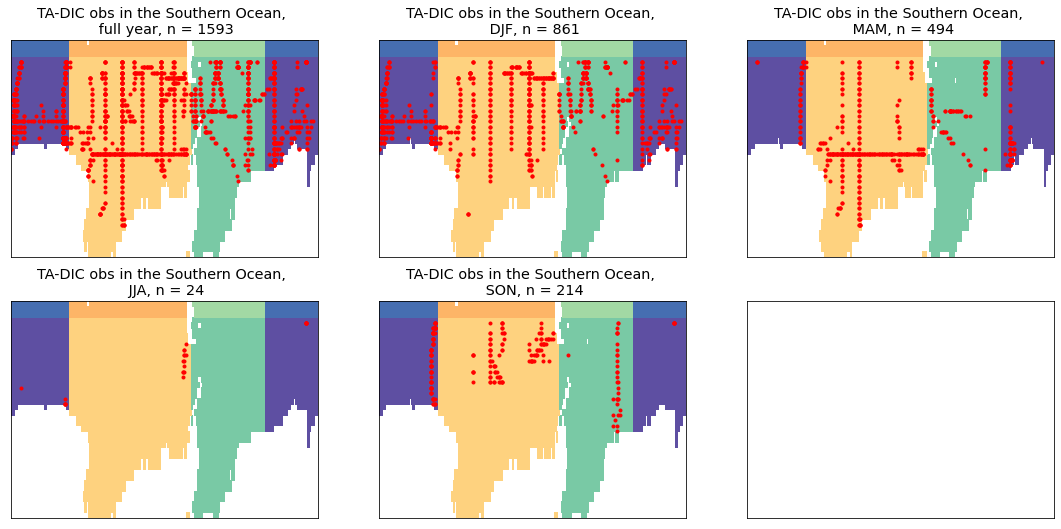

In [136]:
tits = ['full year', 'DJF', 'MAM', 'JJA', 'SON']
fact = 1.1
fig, axs = plt.subplots(2,3, figsize=(17*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i in range(0,5):
    axs[i].pcolor(maskno, cmap = tcm, vmin = 0.5, vmax = 4)
    
    if (i == 0):
        tdf = df.loc[df['tSO'] > 0] 
        axs[i].scatter(tdf.tX, tdf.tY, marker = '.', color = 'r')
        axs[i].set_title(f'TA-DIC obs in the Southern Ocean, \n {tits[i]}, n = {len(tdf.tX)}')
    if (i > 0):
        tdf = df.loc[(df.tSO > 0) & (df.tSEAS == i)] 
        axs[i].scatter(tdf.tX, tdf.tY, marker = '.', color = 'r')
        axs[i].set_title(f'TA-DIC obs in the Southern Ocean, \n {tits[i]}, n = {len(tdf.tX)}')
        
        
for i in range(0,6):
    axs[i].set_ylim([0,40])
    axs[i].set_xticks([])
    axs[i].set_yticks([])

[Text(1, 0, 'DJF'), Text(2, 0, 'MAM'), Text(3, 0, 'JJA'), Text(4, 0, 'SON')]

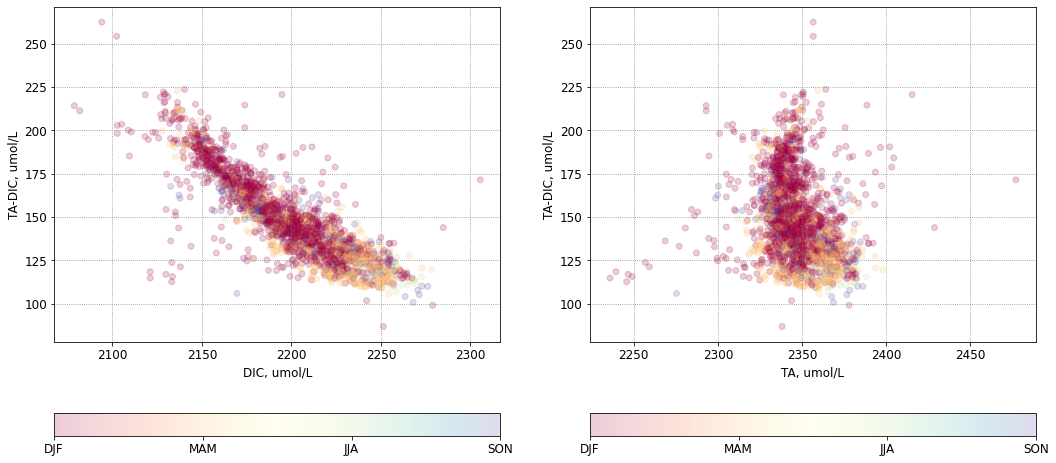

In [106]:
fact = 1.1
fig, axs = plt.subplots(1,2, figsize=(16*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
tdf = df.loc[df['tSO'] > 0] 
w = axs[0].scatter(tdf.DIC, tdf['TA-DIC'], marker = 'o', c = tdf.tSEAS, alpha = 0.2, cmap = 'Spectral')
cbar = plt.colorbar(w, ticks=[1,2,3,4], orientation = 'horizontal', ax = axs[0])
axs[0].grid(color = 'grey', linestyle = ':')
axs[0].set_xlabel('DIC, umol/L')
axs[0].set_ylabel('TA-DIC, umol/L')
cbar.ax.set_xticklabels(['DJF', 'MAM', 'JJA', 'SON']) 

w = axs[1].scatter(tdf.ALK, tdf['TA-DIC'], marker = 'o', c = tdf.tSEAS, alpha = 0.2, cmap = 'Spectral')
cbar = plt.colorbar(w, ticks=[1,2,3,4], orientation = 'horizontal', ax = axs[1])
axs[1].grid(color = 'grey', linestyle = ':')
axs[1].set_xlabel('TA, umol/L')
axs[1].set_ylabel('TA-DIC, umol/L')
cbar.ax.set_xticklabels(['DJF', 'MAM', 'JJA', 'SON']) 

In [ ]:
tmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
tmesh['csize'] = tmesh.tmask[0,0,:,:] * tmesh.e1t[0,:,:] * tmesh.e2t[0,:,:]

SOmask = np.zeros_like(maskno)
SOmask[(maskno == 1.8) |(maskno == 3.2) |(maskno == 4)] = 1

SOmask_size = tmesh.csize * SOmask

In [191]:
def make_yearlist(yrst, yrend, dtype, tr, baseDir):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        ty = f'{baseDir}/{tr}/ORCA2_1m_{yrs[i]}*{dtype}*.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist


depth = 0
dtype = 'ptrc'
modlist = ['TOM12_TJ_GEA1']

def give_so_means(modnam):
    
    print(f'starting {modnam} extraction!')
    
    baseDir = '/gpfs/data/greenocean/software/runs/'
    tylist = make_yearlist(1991, 2020, 'ptrc', modnam, baseDir)
    tdat_MOD = xr.open_mfdataset(tylist)
    tylist = make_yearlist(1991, 2020, 'diad', modnam, baseDir)
    tdat_MOD_diad = xr.open_mfdataset(tylist)
    
    DIC_mean = tdat_MOD.DIC.isel(deptht = 0).weighted(SOmask_size).mean(dim = ['x','y']) * 1e6
    TA_mean = tdat_MOD.Alkalini.isel(deptht = 0).weighted(SOmask_size).mean(dim = ['x','y']) * 1e6
    Cflx_mean = tdat_MOD_diad.Cflx.weighted(SOmask_size).mean(dim = ['x','y']) 
    pCO2_mean = tdat_MOD_diad.pCO2.weighted(SOmask_size).mean(dim = ['x','y']) 
    dpCO2_mean = tdat_MOD_diad.dpCO2.weighted(SOmask_size).mean(dim = ['x','y']) 

    savenam = f'./meanxr/{modnam}_means.nc'
    data_vars = {'DIC_mean':(['time_counter'], DIC_mean.values),
                 'TA_mean':(['time_counter'], TA_mean.values),
                 'Cflx_mean':(['time_counter'], Cflx_mean.values),
                 'pCO2_mean':(['time_counter'], pCO2_mean.values),
                 'dpCO2_mean':(['time_counter'], dpCO2_mean.values),
    }
    dt = DIC_mean.indexes['time_counter'].to_datetimeindex()
    # define coordinates
    coords = {'time_counter': (['time_counter'], dt),
            }
    # define global attributes
    attrs = {'made in':'SOZONE/SOZONE/MaiInternship/cflx_vs_tadic.ipynb',
    'desc': ''
    }
    ds = xr.Dataset(data_vars=data_vars,
    coords=coords,
    attrs=attrs)
    try:
        ds.to_netcdf(savenam)
        print(f'{modnam} extracted') 
    except:
        print('maybe already made')

In [193]:
# give_so_means('TOM12_TJ_GEA1')
# give_so_means('TOM12_TJ_CNA1')
# give_so_means('RIV12_PT_ER23')
# give_so_means('RIV12_PT_ER24')
give_so_means('TOM12_TJ_GEA0')
give_so_means('RIV12_PT_NC02')
give_so_means('RIV12_PT_NC01')

starting TOM12_TJ_GEA0 extraction!
TOM12_TJ_GEA0 extracted
starting RIV12_PT_NC02 extraction!
RIV12_PT_NC02 extracted
starting RIV12_PT_NC01 extraction!
RIV12_PT_NC01 extracted


In [194]:
GEA1 = xr.open_dataset('./meanxr/TOM12_TJ_GEA1_means.nc')
GEA0 = xr.open_dataset('./meanxr/TOM12_TJ_GEA0_means.nc')
CNA1 = xr.open_dataset('./meanxr/TOM12_TJ_CNA1_means.nc')
ER23 = xr.open_dataset('./meanxr/RIV12_PT_ER23_means.nc')
ER24 = xr.open_dataset('./meanxr/RIV12_PT_ER24_means.nc')
NC01 = xr.open_dataset('./meanxr/RIV12_PT_NC01_means.nc')
NC02 = xr.open_dataset('./meanxr/RIV12_PT_NC02_means.nc')

<xarray.DataArray 'year' (year: 30)>
array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020])
Coordinates:
  * year     (year) int64 1991 1992 1993 1994 1995 ... 2016 2017 2018 2019 2020

In [202]:
def plot_mod(txr, c, lab):
    tplt = txr.DIC_mean.groupby('time_counter.year').mean()
    axs[0].plot(yr, tplt, color = c, label = lab)
    axs[0].axhline(np.mean(tplt), color = c, linestyle = ':')
    
    tplt = txr.DIC_mean.sel(time_counter=(txr['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
    axs[2].plot(yr, tplt, color = c, label = lab)
    axs[2].axhline(np.mean(tplt), color = c, linestyle = ':')
    
    tplt = txr.DIC_mean.sel(time_counter=(txr['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()
    axs[3].plot(yr, tplt, color = c, label = lab)
    axs[3].axhline(np.mean(tplt), color = c, linestyle = ':')
    
    tplt = txr.DIC_mean.sel(time_counter=(txr['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()
    axs[4].plot(yr, tplt, color = c, label = lab)
    axs[4].axhline(np.mean(tplt), color = c, linestyle = ':')
    axs[4].legend()
    
    tplt = txr.DIC_mean.sel(time_counter=(txr['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()
    axs[5].plot(yr, tplt, color = c, label = lab)
    axs[5].axhline(np.mean(tplt), color = c, linestyle = ':')

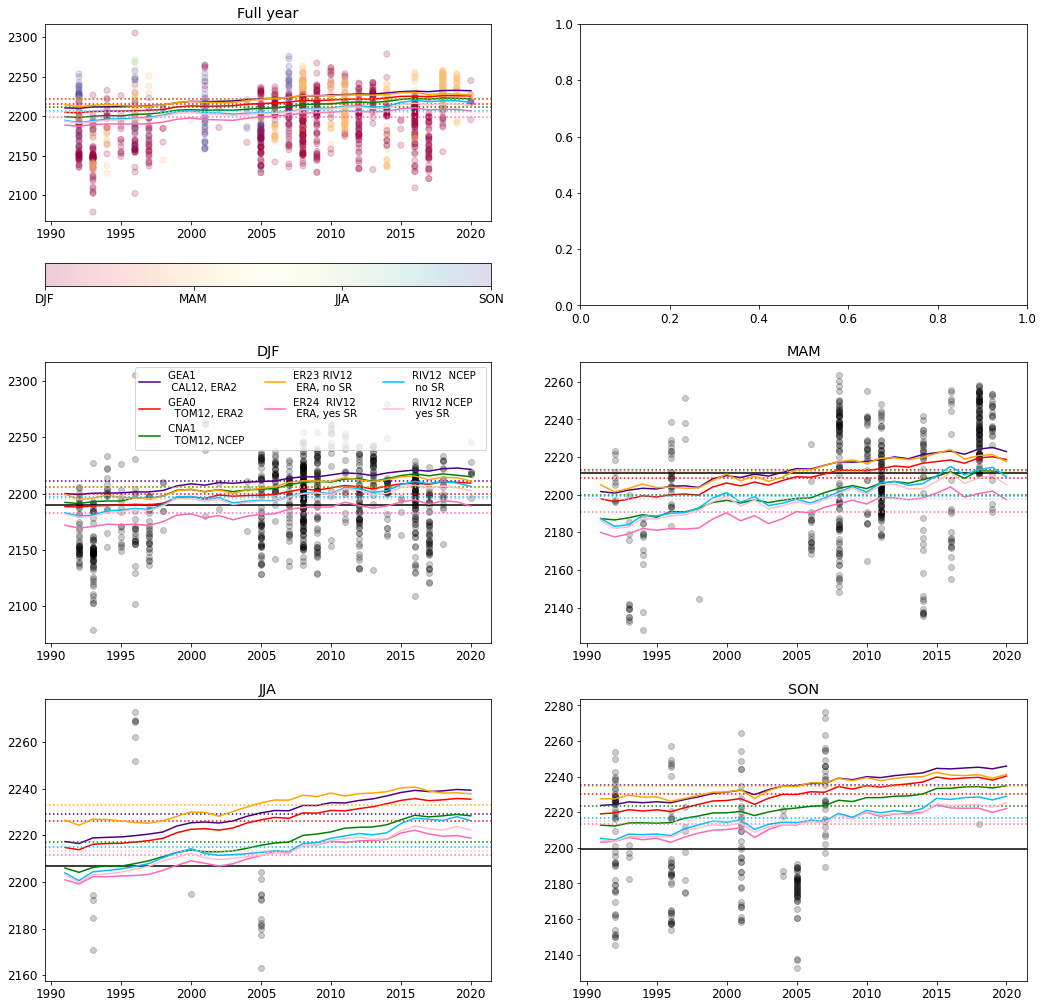

In [219]:
fact = 1.1
fig, axs = plt.subplots(3,2, figsize=(16*fact, 16*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()


tdf = df.loc[df['tSO'] > 0] 
w = axs[0].scatter(tdf.YR, tdf.DIC, marker = 'o', c = tdf.tSEAS, alpha = 0.2, cmap = 'Spectral')
cbar = plt.colorbar(w, ticks=[1,2,3,4], orientation = 'horizontal', ax = axs[0])

cbar.ax.set_xticklabels(['DJF', 'MAM', 'JJA', 'SON']) 
axs[0].set_title('Full year')

for i in range(1,5):
    ind = i+1
    tdf = df.loc[(df['tSO'] > 0) & (df['tSEAS'] == i)] 
    w = axs[ind].scatter(tdf.YR, tdf.DIC, marker = 'o', c = 'k', alpha = 0.2)
    axs[ind].axhline(np.mean(tdf.DIC), c = 'k')
tits = ['Full year', '', 'DJF', 'MAM', 'JJA', 'SON']
for i in range(0,6):
    #axs[i].grid(color = 'grey', linestyle = ':')
    axs[i].set_title(tits[i])

    
# yrs = GEA1.time_counter.groupby('time_counter.year').mean()
# yr = yrs.year
c = 'indigo'
lab = 'GEA1'
plot_mod(GEA1, 'indigo', 'GEA1 \n CAL12, ERA2')
plot_mod(GEA0, 'r', 'GEA0 \n  TOM12, ERA2')
plot_mod(CNA1, 'g', 'CNA1 \n  TOM12, NCEP')

plot_mod(ER23, 'orange', 'ER23 RIV12 \n ERA, no SR')
plot_mod(ER24, 'hotpink', 'ER24  RIV12  \n ERA, yes SR')
plot_mod(NC01, 'deepskyblue', 'RIV12  NCEP  \n no SR')
plot_mod(NC02, 'pink', 'RIV12 NCEP \n yes SR')


axs[2].legend(ncol = 3, fontsize = 10.2)

In [133]:
DIC_mean = tdat_MOD.DIC.isel(deptht = 0).mean(dim = 'time_counter').\
    weighted(SOmask_size).mean(dim = ['x','y']) * 1e6
DIC_mean_DJF = tdat_MOD.DIC.isel(deptht = 0).sel(time_counter=(tdat_MOD['time_counter.season'] == 'DJF')).\
    weighted(SOmask_size).mean(dim = ['x','y']).mean(dim = 'time_counter') * 1e6
print(DIC_mean.values)
print(DIC_mean_DJF.values)

2222.6074212629383
2211.637996398375


In [138]:
DIC_mean_DJF = tdat_MOD.DIC.isel(deptht = 0).sel(time_counter=(tdat_MOD['time_counter.season'] == 'DJF')).\
    weighted(SOmask_size).mean(dim = ['x','y']).groupby('time_counter.year').mean()

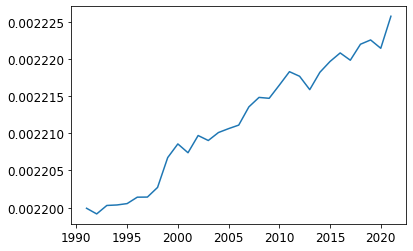

In [141]:
plt.plot(DIC_mean_DJF.year,DIC_mean_DJF)

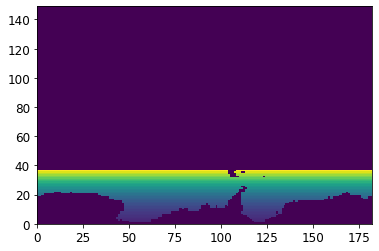

In [114]:
plt.pcolormesh(SOmask_size)

In [110]:
tdat_MOD_diad.Cflx

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, deptht: 31, time_counter: 372, x: 182, y: 149)
Coordinates:
    nav_lat               (y, x) float32 dask.array<chunksize=(149, 182), meta=np.ndarray>
    nav_lon               (y, x) float32 dask.array<chunksize=(149, 182), meta=np.ndarray>
  * deptht                (deptht) float32 4.999938 15.000288 ... 5250.2266
    time_centered         (time_counter) object dask.array<chunksize=(12,), meta=np.ndarray>
  * time_counter          (time_counter) object 1991-01-16 12:00:00 ... 2021-...
Dimensions without coordinates: axis_nbounds, x, y
Data variables:
    deptht_bounds         (time_counter, deptht, axis_nbounds) float32 dask.array<chunksize=(12, 31, 2), meta=np.ndarray>
    DOCTRP                (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    time_centered_bounds  (time_counter, axis_nbounds) object dask.array<chunksize=(12, 2), meta=np.ndarray>
    time_counter_bounds   (time_counter, axis_nbounds) object dask.array<chunksize=(12, 2), meta=np.ndarray>
    EXP                   (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    GRAMIC                (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    GRAMES                (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    GRAMAC                (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    PPTDOC                (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    PPT                   (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    TChl                  (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    Detrit                (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    Carniv                (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    Herbiv                (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    GRAMICPHY             (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    GRAMESPHY             (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    GRAMACPHY             (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    nitrfix               (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    denitr                (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    DELO2                 (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    vsink                 (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    sinksil               (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    probsi                (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    losbsi                (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    remdsi                (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    discarb               (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    ExpCO3                (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    ExpARA                (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    GRAGEL     